## Обзор данных и предобработка

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import datetime
import time
import requests 
from urllib.parse import urlencode
import sys
from scipy import stats as st
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Знакомство с данными

---
Загрузим таблицу из файла `telecom_clients.csv`:

In [2]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://yadi.sk/d/qDyw04TLVP4CiA' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url_cl = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url_cl) 
date_parser = lambda x: pd.to_datetime(x)
clients = pd.read_csv(download_url_cl, parse_dates=['date_start'], date_parser=date_parser)

# выводим 5 строк для ознакомления
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


В таблице 3 столбца и 732 строки, типы данных (по столбцам): `datetime64[ns]`(1), `int64`(1), `object`(1).

Описание столбцов:
- `user_id` — идентификатор клиентского аккаунта (колл-центра) в сервисе;
- `tariff_plan` — текущий тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

<div style="border:solid green 1px; padding: 10px">

Названия столбцов в одном регистре и стиле. 
Пропусков в данных нет. Проверим данные на дубликаты.

---
Загрузим таблицу из файла `telecom_dataset.csv`:

In [4]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://yadi.sk/d/Z6Q6KHy2I_WwCA' 

# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 

In [5]:
# загружаем файл в df 
df = pd.read_csv(download_url, parse_dates=['date'], date_parser=date_parser)

# выводим 5 строк для ознакомления
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

В таблице 9 столбцов и 53902 строк, типы данных (по столбцам): `bool`(1), `datetime64[ns, pytz.FixedOffset(180)]`(1), `float64`(1), `int64`(4), `object`(2).

Описание столбцов:
- `user_id` — идентификатор клиентского аккаунта (колл-центра) в сервисе;
- `date` — дата статистики;
- `direction` — направление вызовов (`out` - исходящий вызов, `in` — входящий вызов);
- `internal` — является ли звонок внутренним звонком между операторами клиента;
- `operator_id` — идентификатор оператора;
- `is_missed_call` — яляется ли звонок пропущенным;
- `calls_count` — количество звонков;
- `call_duration` — длительность звонка в секундах (без учета времени ожидания);
- `total_call_duration` — длительность звонка в секундах (с учетом времени ожидания).

<div style="border:solid green 1px; padding: 10px">

Названия столбцов в одном регистре и стиле. Типы данных не везде соответствуют содержанию, так столбец `date` хранится с типом данных `datetime64[ns, pytz.FixedOffset(180)], логичнее перевести его в `datetime64[ns]`, столбец `internal`логичнее перевести из `object` в `bool`, столбец `operator_id` логичнее перевести в `int`.
    
В столбцах `call_duration` и `total_call_duration` данные отображены целыми числами (длительность в секундах), для удобства отобразим их в форме времени, к примеру `0:00:03` или `0:12:25`.
    
Есть пропуски в столбцах `internal` и `operator_id`.
    
Приведем типы данных столбцов к нужным, обработаем пропуски и проверим данные на дубликаты.

### Предобработка данных

In [7]:
# поиск и подсчет пропусков в столбцах
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [8]:
# доля пропусков в столбце 'internal' от общего
df['internal'].isna().sum() / df.shape[0] * 100

0.21706059144373122

В столбце `internal` содержится информация о том является ли звонок внешним или он внутренний между операторами. В связи с пропусками значений нет возможности отнести звонок к какой-то из групп, а т.к. доля пропущенных значений составляет 0.21% от общего датасета, то строки с пропущенными значениями в этом столбце можем удалить.

В столбце `operator_id` храняться данные об идентификаторах операторов, пропуски здесь означают, что звонок не назначен на оператора по каким-то причинам, к примеру звонивший не дождался в очереди. Для удобства работы заменим пропуски на значение `0`, что будем понимать как звонок, не распределенный на оператора.

In [9]:
# изменение типа данных и удаление/заполнение пропусков
df['date'] = df['date'].dt.tz_convert(None)
df['operator_id'] = df['operator_id'].fillna(0).astype('int')
df = df.dropna()
df['internal'] = df['internal'].astype('bool')

In [10]:
# функция для изменения отображения в столбце 'call_duration'
def duration(row):
    seconds = row['call_duration']
    if seconds == '0':
        return '0'
    if seconds != '0':
        return str(datetime.timedelta(seconds=seconds))

df['call_duration_frmtd'] = df.apply(duration, axis=1)   

# функция для изменения отображения в столбце 'total_call_duration'
def ttl_duration(row):
    seconds = row['total_call_duration']
    if seconds == '0':
        return '0'
    if seconds != '0':
        return str(datetime.timedelta(seconds=seconds))

df['total_call_duration_frmtd'] = df.apply(ttl_duration, axis=1)   

In [11]:
# проверим сработали ли изменения
clients.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    53785 non-null  int64         
 1   date                       53785 non-null  datetime64[ns]
 2   direction                  53785 non-null  object        
 3   internal                   53785 non-null  bool          
 4   operator_id                53785 non-null  int64         
 5   is_missed_call            

In [12]:
# подсчёт явных дубликатов
df.duplicated().sum()

4893

In [13]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
# проверка
df.duplicated().sum()

0

## Исследовательский анализ данных

1. Проверим данные на наличие аномалий или выбросов;
2. Добавим новые столбцы в датафрейм с информацией о времени ожидания на линии до ответа оператора, о месяце, за который собраны данные;
3. Разделим колл-центры по направлению вызовов (входящие обращения или исходящие звонки), выделим только внешние входящие и внешние исходящие вызовы;
4. Оставим для анализа только те записи, в которых произошло назначение оператора при входящих вызовах, а также посмотрим как распределяется количество рабочих дней для операторов в колл-центрах.

### Построим гистограммы для визуализации данных

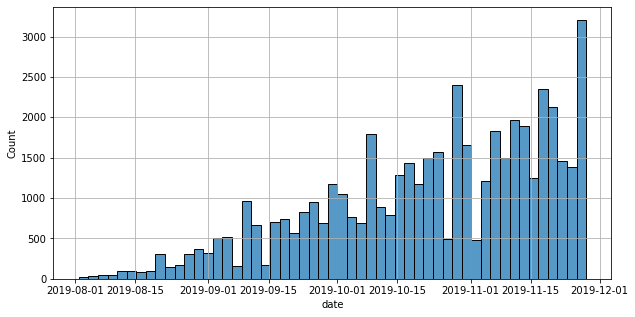

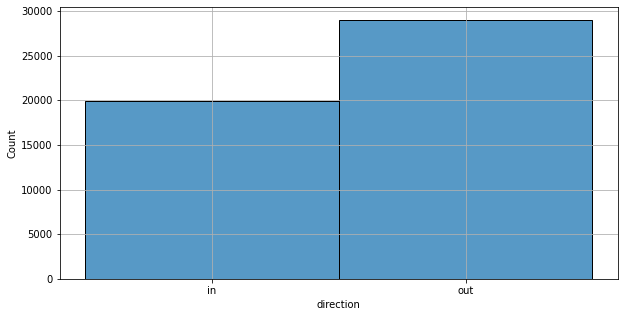

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


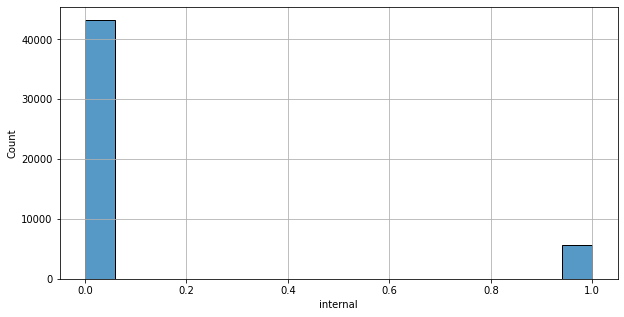

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


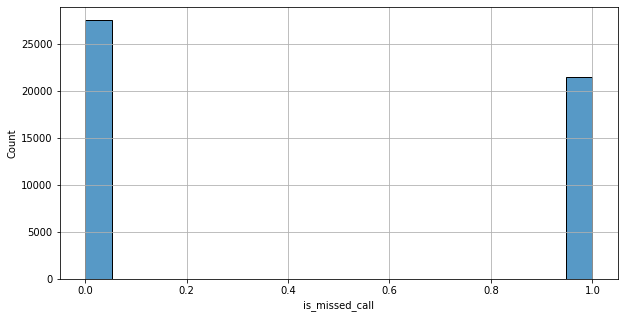

In [15]:
# построим гистограммы для визуализации данных с помощью цикла 
columns = ['date', 'direction', 'internal', 'is_missed_call']

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=df, x=df[col])
    plt.show()

<div style="border:solid green 1px; padding: 10px">

Мы располагаем данными за период с 1 августа 2019 по 27 ноября 2019, практически 4 месяца. Однако количество записей в начале периода значительно меньше чем в конце.
    
* Исходящих звонков больше, чем входящих на ~ 9000.
    
* Разговоров между операторами намного меньше чем по внешним вызовам (всего 5763 шт.).
    
* Разница между принятыми и пропущенными вызовами (как для входящих, так и для исходящих) составляет около 6000.

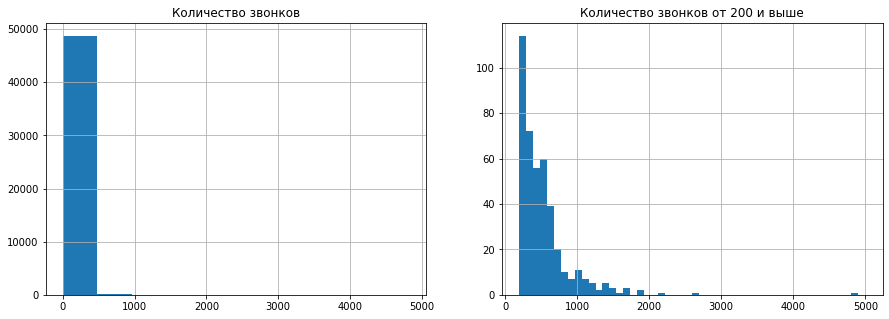

In [16]:
# посмотрим на данные по количеству звонков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.grid()
ax1.hist(df['calls_count'])
ax1.set_title('Количество звонков')
ax2.grid()
ax2.hist(df['calls_count'], bins=50, range=(200, 5000))
ax2.set_title('Количество звонков от 200 и выше');

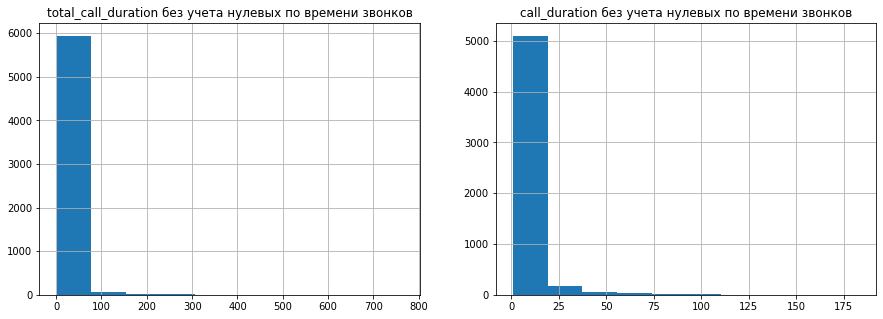

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.grid()
ax1.hist(df.query('total_call_duration_frmtd != "0:00:00"')['total_call_duration_frmtd'].value_counts())
ax1.set_title('total_call_duration без учета нулевых по времени звонков')
ax2.grid()
ax2.hist(df.query('call_duration_frmtd != "0:00:00"')['call_duration_frmtd'].value_counts())
ax2.set_title('call_duration без учета нулевых по времени звонков');

<div style="border:solid green 1px; padding: 10px">
    
Большинство обрабатывает от 1 до 200 звонков, но есть и те, у кого звонков больше (максимум 4817 шт.).
    
По длительности (общей или без ожидания) есть вызовы:
- по несколько секунд (одна, семь, десять), возможно это "сорвавшиеся" звонки, к примеру из-за разъединения или в случае нечаянного нажатия кнопки "отбой связи", или ошиблись номером 🤭;
- по несколько часов (10 и более) и даже больше одного дня, что выглядит довольно странно.

По умолчанию оптимальной длительностью звонка считается диапазон от 30 секунд до 2 минут. Возможно и есть такие вопросы, которые приходится решать не один час, но уж точно не сутки и более. Ограничим данные по верхнему значению в 5 часов.    

In [18]:
df = df.query('call_duration <= 18000')

### Добавим новые столбцы в датафрейм

Добавим в основной датафрейм столбец с месяцем, за который собрана статистика, и столбец с временем ожидания на линии:

In [19]:
# добавим столбец с месяцем статистики
df['month'] = df['date'].dt.month

In [20]:
# добавим время ожидания на линии
df['waiting_time'] = df['total_call_duration'] - df['call_duration']
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_duration_frmtd,total_call_duration_frmtd,month,waiting_time
0,166377,2019-08-03 21:00:00,in,False,0,True,2,0,4,0:00:00,0:00:04,8,4
1,166377,2019-08-04 21:00:00,out,True,880022,True,3,0,5,0:00:00,0:00:05,8,5
2,166377,2019-08-04 21:00:00,out,True,880020,True,1,0,1,0:00:00,0:00:01,8,1
3,166377,2019-08-04 21:00:00,out,True,880020,False,1,10,18,0:00:10,0:00:18,8,8
4,166377,2019-08-04 21:00:00,out,False,880022,True,3,0,25,0:00:00,0:00:25,8,25


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48699 entries, 0 to 48891
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    48699 non-null  int64         
 1   date                       48699 non-null  datetime64[ns]
 2   direction                  48699 non-null  object        
 3   internal                   48699 non-null  bool          
 4   operator_id                48699 non-null  int64         
 5   is_missed_call             48699 non-null  bool          
 6   calls_count                48699 non-null  int64         
 7   call_duration              48699 non-null  int64         
 8   total_call_duration        48699 non-null  int64         
 9   call_duration_frmtd        48699 non-null  object        
 10  total_call_duration_frmtd  48699 non-null  object        
 11  month                      48699 non-null  int64         
 12  wait

### Разделим колл-центры по направлению вызовов

В наших данных есть разделение на входящие обращения или исходящие звонки (столбец `direction`, где `out`- исходящий вызов, `in` — входящий вызов), выделим только внешние входящие и внешние исходящие вызовы (на то, внешний ли звонок, указывает значение в столбце `internal`) и разделим по этому признаку колл-центры.

In [22]:
out_calls = df.query('direction == "out" and internal==False')
in_calls = df.query('direction == "in" and internal==False')

###  Отсортируем записи по назначению оператора и посмотрим на количество рабочих дней

Оставим для анализа только те записи, в которых произошло назначение оператора при входящих вызовах (т.к. нам нужно оценить именно работу операторов), а также посмотрим как распределяется количество рабочих дней для операторов в разрезе колл-центрах. А также добавим новый столбец с количеством обработанных вызовов.

In [23]:
# уберем записи без операторов для входящих вызовов
in_calls = in_calls.query('operator_id != 0')

Для колл-центров, работающих по исходящим вызовам назначение оператора должно быть всегда, т.к. именно оператор инициирует внешний вызов. Проверим есть ли в нашей таблице по исходящим вызовам записи без назначенного оператора:

In [24]:
# проверка назначения оператора при исходящих вызовах
out_calls.query('operator_id == 0')['operator_id'].count()

145

In [25]:
# доля от общего датасета
out_calls.query('operator_id == 0')['operator_id'].count() / out_calls.shape[0] * 100

0.6081194430464687

Такие записи есть (146 шт.), здесь возможен технический сбой при записи строки. Т.к. доля таких значений от всего датафрейма мала (меньше 1%), удалим их.

In [26]:
# удаляем записи без оператора
out_calls = out_calls.query('operator_id != 0')

In [27]:
# посмотрим как распределяется количество рабочих дней и вызовов для операторов в разрезе колл-центров по месяцам
operator_in_calls = (in_calls.groupby(['user_id','operator_id']).agg({'date': 'count', 'calls_count': 'sum'})
                   .reset_index())
operator_in_calls.columns = ['user_id',  'operator_id', 'days_worked', 'calls_count']

In [28]:
#добавим столбец с количеством пропущенных звонков
is_missed_call = (in_calls.query('is_missed_call == True').groupby(['user_id','operator_id'])['calls_count']
                  .sum().reset_index())
is_missed_call.columns = ['user_id', 'operator_id','missed_calls']
operator_in_calls = operator_in_calls.merge(is_missed_call, on=['user_id', 'operator_id'], how='left')
operator_in_calls['missed_calls'] = operator_in_calls['missed_calls'].fillna(0).astype('int')

# добавим столбец с фактически принятыми звонками в день, совершенными оператором
operator_in_calls['success_calls'] = operator_in_calls['calls_count']-operator_in_calls['missed_calls']
operator_in_calls.head(10)

,user_id,operator_id,days_worked,calls_count,missed_calls,success_calls
0,166377,880020,7,7,0,7
1,166377,880022,8,8,0,8
2,166377,880026,18,24,0,24
3,166377,880028,41,63,0,63
4,166391,882476,3,3,0,3
5,166391,882478,1,1,0,1
6,166392,886892,1,2,0,2
7,166392,891900,17,33,0,33
8,166392,891906,29,67,0,67
9,166399,886674,9,11,0,11


In [29]:
# посмотрим как распределяется количество рабочих дней и вызовов для операторов в разрезе колл-центров по месяцам
operator_out_calls = (out_calls.groupby(['user_id','operator_id']).agg({'date': 'count', 'calls_count':'sum'})
                      .reset_index())
operator_out_calls.columns = ['user_id', 'operator_id', 'days_worked', 'calls_count']

In [30]:
#добавим столбец с количеством пропущенных звонков
missed_calls = (out_calls.query('is_missed_call == True').groupby(['user_id','operator_id'])['calls_count']
                  .sum().reset_index())
missed_calls.columns = ['user_id', 'operator_id','missed_calls']
operator_out_calls = operator_out_calls.merge(missed_calls, on=['user_id', 'operator_id'], how='left')
operator_out_calls['missed_calls'] = operator_out_calls['missed_calls'].fillna(0).astype('int')

# добавим столбец с фактически принятыми звонками в день, совершенными оператором
operator_out_calls['success_calls'] = operator_out_calls['calls_count']-operator_out_calls['missed_calls']
operator_out_calls.head(10)

,user_id,operator_id,days_worked,calls_count,missed_calls,success_calls
0,166377,880020,10,34,19,15
1,166377,880022,54,174,90,84
2,166377,880026,151,2188,628,1560
3,166377,880028,154,2489,987,1502
4,166377,881278,5,12,9,3
5,166405,882684,101,651,206,445
6,166405,882686,150,2876,941,1935
7,166405,882688,7,43,15,28
8,166405,882690,40,1416,466,950
9,166405,902510,94,1841,644,1197


<div style="border:solid green 1px; padding: 10px">
    
Здесь видно, что есть операторы, которые за один день работы обработали один звонок, а есть такие, у которых в день звонков обработано намного больше. Также видно сколько звонков было пропущено.

Из-за того, что в колл-центрах есть явные трудоголики, посмотрим на сколько среднее отличается от медианы по датасетам:

In [31]:
print('Входящие')
display(in_calls.describe())
print('Исходящие')
out_calls.describe()

Входящие


,user_id,operator_id,calls_count,call_duration,total_call_duration,month,waiting_time
count,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000
mean,167291.692709,916333.850265,7.333442,741.152098,840.489043,10.209043,99.336945
std,580.205442,20178.040904,13.768738,1271.452809,1401.784718,0.831865,187.955734
min,166377.000000,879896.000000,1.000000,0.000000,1.000000,8.000000,0.000000
25%,166837.000000,900894.000000,1.000000,70.000000,97.000000,10.000000,17.000000
50%,167158.000000,912722.000000,3.000000,275.000000,324.000000,10.000000,40.000000
75%,167816.000000,936110.000000,7.000000,867.500000,973.000000,11.000000,100.000000
max,168606.000000,973286.000000,207.000000,15663.000000,16759.000000,11.000000,3998.000000


Исходящие


,user_id,operator_id,calls_count,call_duration,total_call_duration,month,waiting_time
count,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,167315.836533,916670.636567,21.541584,983.088569,1409.626567,10.158446,426.537997
std,620.488007,21794.959816,61.496058,2075.008148,2603.727655,0.861250,1276.955985
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,8.000000,0.000000
25%,166715.000000,900180.000000,2.000000,0.000000,99.000000,10.000000,37.000000
50%,167175.000000,916618.000000,7.000000,42.000000,410.000000,10.000000,127.000000
75%,167888.000000,937780.000000,22.000000,999.000000,1526.500000,11.000000,386.000000
max,168606.000000,973120.000000,4817.000000,17575.000000,58027.000000,11.000000,46474.000000


Среднее сильно отличается от медианы и по таблице входящих вызовов, и по таблице исходящих.
Поэтому при подсчете средних показателей по каждому колл-центру в день будем использовать медианное зачение.

### Расчитаем средние показатели для колл-цента в день

Соберем в одну таблицу данные для каждого колл-центра по:
- общему количество дней наблюдений, общему количеству звонков, общей продолжительности с/без учета времени ожидания, 
общему времени ожидания;
- среднему количеству звонков в день;
- средней продолжительности звонка в день (с/без учета времени ожидания);
- среднего времени ожидания на линии.

In [32]:
# собираем таблицу по входящим вызовам
in_calls_df = (in_calls.groupby('user_id')
                    .agg({'date': 'count', 'calls_count': 'sum', 'call_duration': 'sum',
                          'total_call_duration': 'sum', 'waiting_time': 'sum'}).reset_index()
                   )
in_calls_df['calls_per_day'] = round(in_calls_df['calls_count'] / in_calls_df['date'], 2)
in_calls_df['call_duration_per_call'] = round(in_calls_df['call_duration'] / in_calls_df['calls_count'], 2)
in_calls_df['ttl_call_duration_per_call'] = round(in_calls_df['total_call_duration'] / in_calls_df['calls_count'], 2)
in_calls_df['waiting_time_per_call'] = round(in_calls_df['waiting_time'] / in_calls_df['calls_count'], 2)
in_calls_df.head()

,user_id,date,calls_count,call_duration,total_call_duration,waiting_time,calls_per_day,call_duration_per_call,ttl_call_duration_per_call,waiting_time_per_call
0,166377,74,102,7436,8088,652,1.38,72.90,79.29,6.39
1,166391,4,4,249,357,108,1.00,62.25,89.25,27.00
2,166392,47,102,16652,19732,3080,2.17,163.25,193.45,30.20
3,166399,9,11,166,334,168,1.22,15.09,30.36,15.27
4,166405,248,2191,381450,422081,40631,8.83,174.10,192.64,18.54


In [33]:
# собираем таблицу по исходящим вызовам
out_calls_df = (out_calls.groupby('user_id')
                    .agg({'date': 'count', 'calls_count': 'sum', 'call_duration': 'sum',
                          'total_call_duration': 'sum', 'waiting_time': 'sum'}).reset_index()
                   )
out_calls_df['calls_per_day'] = round(out_calls_df['calls_count'] / out_calls_df['date'], 2)
out_calls_df['call_duration_per_call'] = round(out_calls_df['call_duration'] / out_calls_df['calls_count'], 2)
out_calls_df['ttl_call_duration_per_call'] = round(out_calls_df['total_call_duration'] / out_calls_df['calls_count'], 2)
out_calls_df['waiting_time_per_call'] = round(out_calls_df['waiting_time'] / out_calls_df['calls_count'], 2)
out_calls_df.head()

,user_id,date,calls_count,call_duration,total_call_duration,waiting_time,calls_per_day,call_duration_per_call,ttl_call_duration_per_call,waiting_time_per_call
0,166377,374,4897,310419,378454,68035,13.09,63.39,77.28,13.89
1,166405,581,9789,770393,955972,185579,16.85,78.70,97.66,18.96
2,166406,243,8048,311820,425935,114115,33.12,38.75,52.92,14.18
3,166407,88,306,19058,22864,3806,3.48,62.28,74.72,12.44
4,166485,361,6132,346789,440877,94088,16.99,56.55,71.90,15.34


Входящие


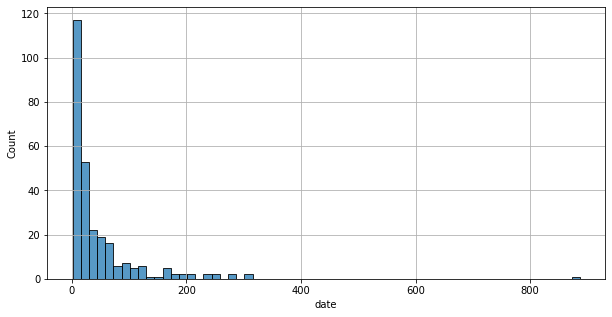

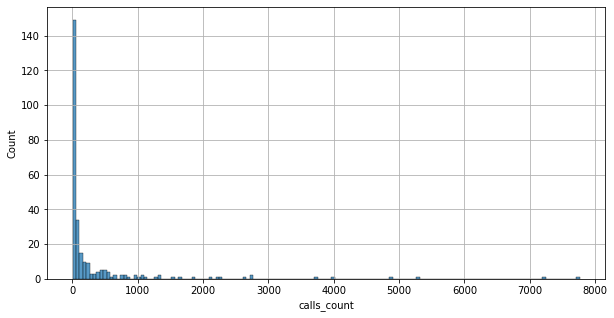

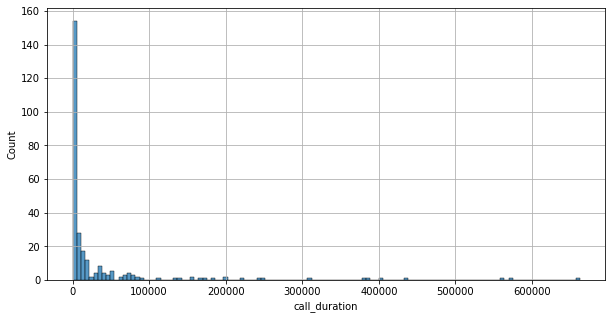

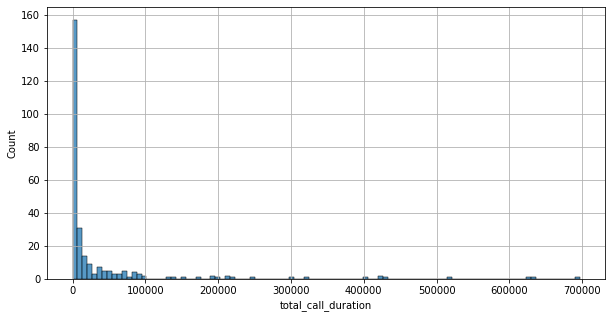

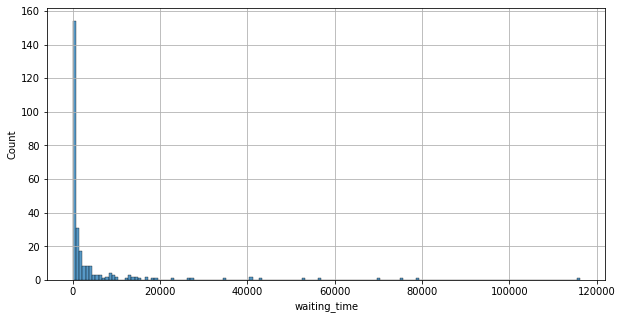

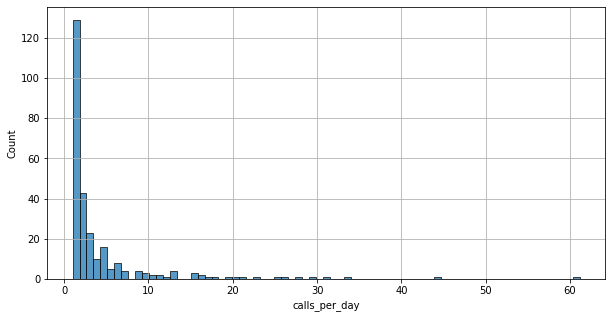

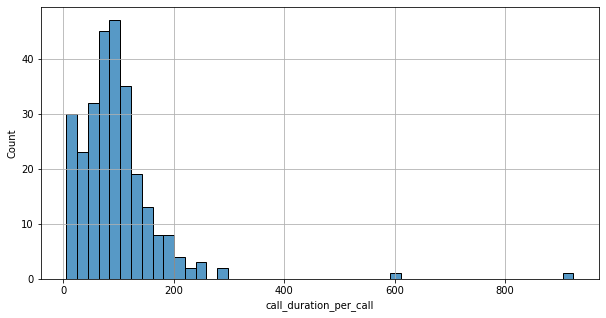

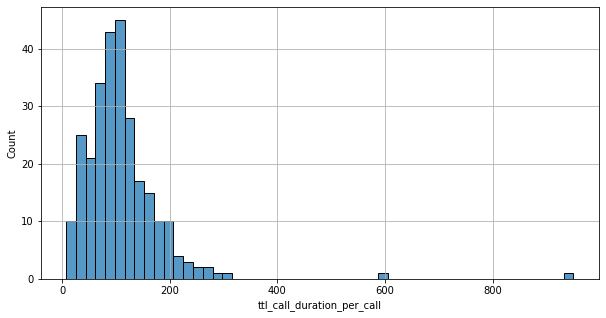

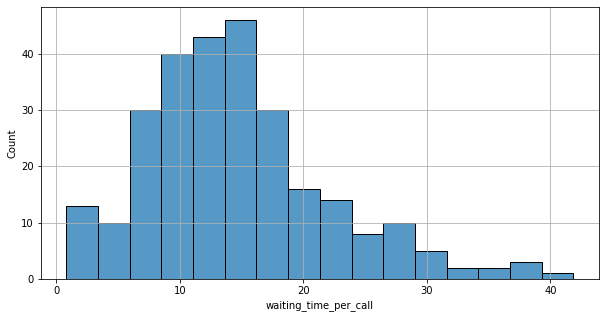

In [34]:
# построим гистограммы для визуализации данных с помощью цикла 
print('Входящие')
for col in in_calls_df.drop('user_id', axis=1).columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=in_calls_df, x=in_calls_df[col])
    plt.show()

Исходящие


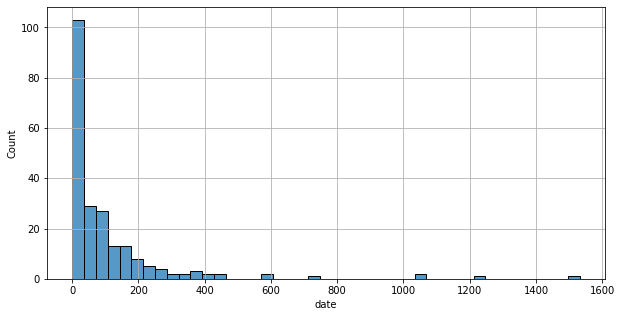

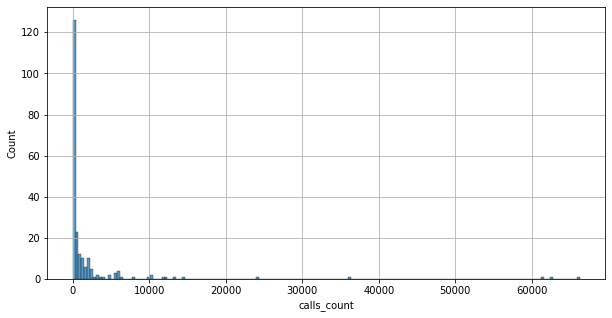

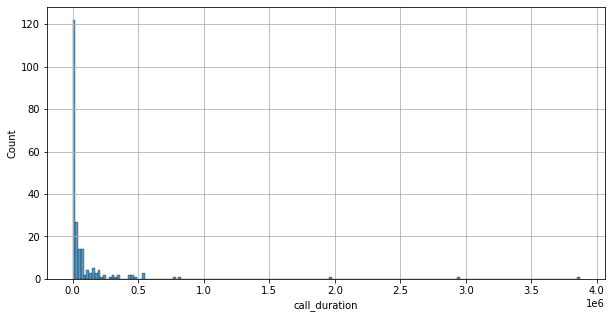

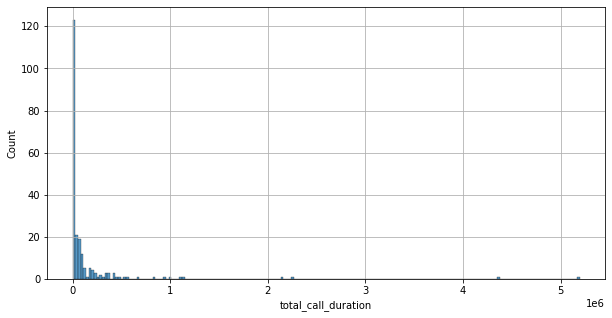

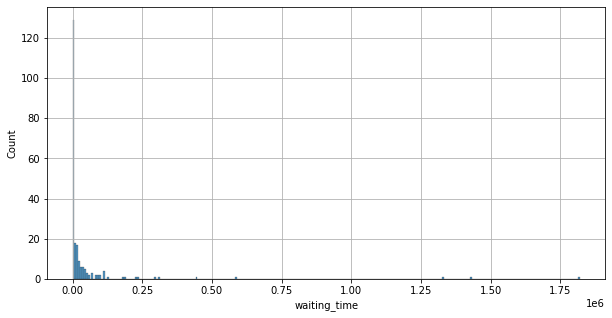

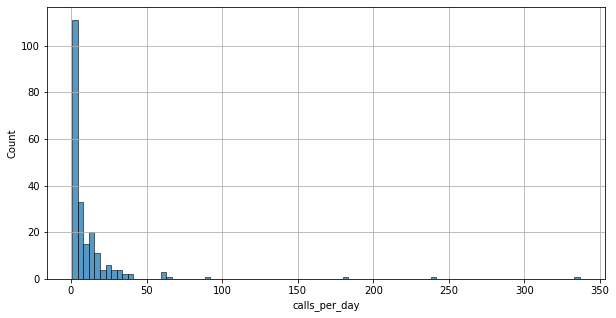

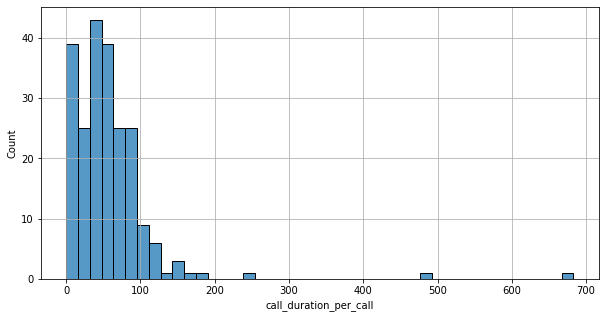

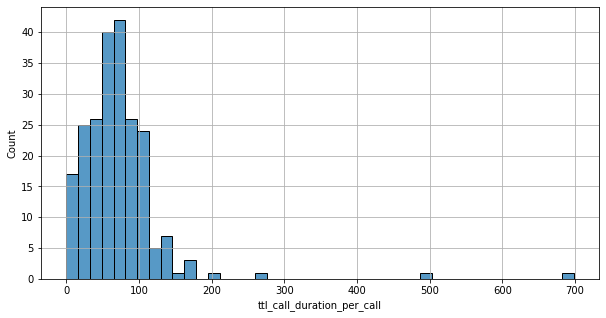

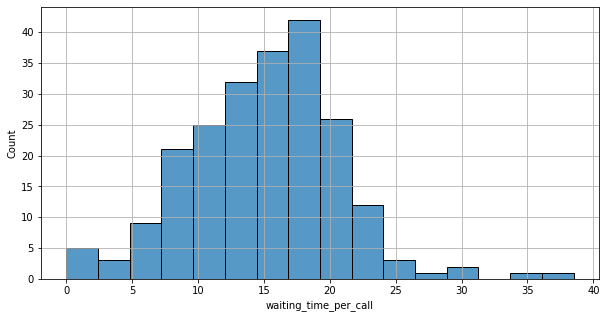

In [35]:
# построим гистограммы для визуализации данных с помощью цикла 
print('Исходящие')
for col in out_calls_df.drop('user_id', axis=1).columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=out_calls_df, x=out_calls_df[col])
    plt.show()

In [36]:
# посмотрим когда зарегистрированы клиенты с малым числом звонков в день (до 5 шт.)
print('Входящие')
(in_calls_df.query('calls_per_day <= 5')[['user_id', 'date', 'calls_per_day']]
 .merge(clients[['user_id', 'date_start']], on='user_id')).sort_values(by='date_start')

Входящие


,user_id,date,calls_per_day,date_start
0,166377,74,1.38,2019-08-01
1,166391,4,1.00,2019-08-01
2,166392,47,2.17,2019-08-01
3,166399,9,1.22,2019-08-01
4,166406,77,2.09,2019-08-02
5,166407,52,1.54,2019-08-02
6,166428,56,2.20,2019-08-02
7,166481,1,1.00,2019-08-05
8,166482,26,1.85,2019-08-05
9,166485,121,4.30,2019-08-06


In [37]:
# посмотрим когда зарегистрированы клиенты с малым числом звонков в день (до 5 шт.)
print('Исходящие')
(out_calls_df.query('calls_per_day <= 5')[['user_id', 'date', 'calls_per_day']]
 .merge(clients[['user_id', 'date_start']], on='user_id')).sort_values(by='date_start')

Исходящие


,user_id,date,calls_per_day,date_start
0,166407,88,3.48,2019-08-02
1,166507,2,1.50,2019-08-06
2,166541,93,2.27,2019-08-07
3,166604,57,1.42,2019-08-12
4,166609,30,5.00,2019-08-12
5,166619,23,1.96,2019-08-12
6,166636,23,2.35,2019-08-12
7,166660,51,2.35,2019-08-13
8,166669,6,1.00,2019-08-14
9,166678,244,4.75,2019-08-14


<div style="border:solid green 1px; padding: 10px">

В основной массе значения:
* в районе до 200 дней, есть и больше;
* до 500 звонков (10-20 в день);
* много значений с маленькой продолжительностью с/без учета времени ожидания (около 100 секунд за звонок);
* время ожидания короткое (15-20 сек за звонок);
* есть колл-центры, где всего несколько звонка в день, это может быть связано с тем, что:
    - в системе клиенты недавно (по датам регистрации видно, что заврегистрированы в сервисе в конце октября);
    - есть сбои в телефонии колл-центра из-за чего звонки не проходят.

##  Определение эффективности операторов по внешним входящим вызовам

### Сравним фактическое количество звонков, которое принял каждый оператор, с числом вызовов, которые оператор может принять в течение дня

Возьмем длительность звонков, принятых оператором, и разделим на среднюю продолжительность каждого звонка. Так мы получим число вызовов, которые оператор может обработать в течение дня, и сравним с фактическим числом звонков в день.

In [38]:
# добавим данные по длительности в таблицу
duration_in_calls = (in_calls.query('is_missed_call == False').groupby(['user_id', 'operator_id'])
 .agg({'call_duration':'mean','total_call_duration': 'sum'}).reset_index())
duration_in_calls.columns = ['user_id', 'operator_id', 'mean_call_duration', 'total_call_duration']

operator_in_calls = operator_in_calls.merge(duration_in_calls, on=['user_id', 'operator_id'], how='left').fillna(0)

In [39]:
# добавим столбец со стандартом звонков в день для оператора
operator_in_calls['call_standard'] = (round(operator_in_calls['total_call_duration'] / 
                                            operator_in_calls['mean_call_duration'], 0).fillna(0))

In [40]:
# определим эффективно ли операторы работают по приему звонков
def calls_efficiency(row):
    calls = row['success_calls']
    reference = row['call_standard']
    if calls >= reference:
        return 'effective'
    if calls < reference:
        return 'no_effective'
    
operator_in_calls['calls_efficiency'] = operator_in_calls.apply(calls_efficiency, axis=1) 
operator_in_calls.head()

,user_id,operator_id,days_worked,calls_count,missed_calls,success_calls,mean_call_duration,total_call_duration,call_standard,calls_efficiency
0,166377,880020,7,7,0,7,42.714286,353.0,8.0,no_effective
1,166377,880022,8,8,0,8,64.000000,624.0,10.0,no_effective
2,166377,880026,18,24,0,24,88.166667,1730.0,20.0,effective
3,166377,880028,41,63,0,63,122.878049,5381.0,44.0,effective
4,166391,882476,3,3,0,3,64.000000,287.0,4.0,no_effective


###  Посмотрим какое среднее время ожидания в день и сравним с тем, что свойственно операторам

Когда мы звоним в контактный центр, то хотим получить максимально быстрый ответ. Но, как правило, прежде чем мы услышим голос оператора проходит от 15 секунд до нескольких минут. Как долго мы будем висеть на линии, зависит от cоглашения об уровне сервиса между заказчиком и колл-центром.

Заказчик и колл-центр договариваются о времени, в течение которого будет приниматься большинство звонков. На сегодняшний день стандарт для большинства колл-центров по всему миру составляет 80/20. Это означает, что в первые 20 секунд должны быть приняты 80% звонков.

In [41]:
(print('Количество соответствующихстандарту колл-центров  в среднем:', 
       in_calls_df.query('waiting_time_per_call <= 20')['user_id'].count()))
 
(print('Количество соответствующихстандарту колл-центров  в среднем:', 
in_calls_df.query('waiting_time_per_call > 20')['user_id'].count()))

Количество соответствующихстандарту колл-центров  в среднем: 218
Количество соответствующихстандарту колл-центров  в среднем: 55


По собранным данным в таблице `in_calls_df` видно, что не по всем колл-центрам стандарт соблюдается. Среднее время ожидания для звонка в 55 колл-центрах превышает порог в 20 секунд. 

Добавим в таблице по операторам столбец эффективности по времени ожидания на линии из расчета, что в первые 20 секунд должны быть приняты 80% звонков.

In [42]:
# соберем те звонки, ожидание по которым меньше 20 секунд
waiting_time_20 = (in_calls.query('is_missed_call == False and waiting_time <= 20')
     .groupby(['user_id', 'operator_id'])['calls_count'].sum().reset_index())
waiting_time_20.columns = ['user_id', 'operator_id', 'calls_wt_20']

In [43]:
# добавим столбец в наш датасет
operator_in_calls = operator_in_calls.merge(waiting_time_20, on=['user_id', 'operator_id'], how='left')
operator_in_calls['calls_wt_20'] = operator_in_calls['calls_wt_20'].fillna(0).astype('int')

In [44]:
# добавим индикатор эффективности по показателю
def waiting_time_efficiency(row):
    waiting_time = row['calls_wt_20']
    calls_count = row['calls_count']
    if waiting_time/calls_count*100 >= 80:
        return 'effective'
    if waiting_time/calls_count*100 < 80:
        return 'no_effective'
    
operator_in_calls['waiting_time_efficiency'] = operator_in_calls.apply(waiting_time_efficiency, axis=1) 
operator_in_calls.head()

,user_id,operator_id,days_worked,calls_count,missed_calls,success_calls,mean_call_duration,total_call_duration,call_standard,calls_efficiency,calls_wt_20,waiting_time_efficiency
0,166377,880020,7,7,0,7,42.714286,353.0,8.0,no_effective,7,effective
1,166377,880022,8,8,0,8,64.000000,624.0,10.0,no_effective,7,effective
2,166377,880026,18,24,0,24,88.166667,1730.0,20.0,effective,22,effective
3,166377,880028,41,63,0,63,122.878049,5381.0,44.0,effective,60,effective
4,166391,882476,3,3,0,3,64.000000,287.0,4.0,no_effective,2,no_effective


### **<font color="green"> Вывод по показателям эффективности операторов на входящих вызовах </font>**

Мы собрали оба показателя в таблицу с операторами `operator_in_calls`, посмотрим как много из них соответствуют им.

Добавим еще один столбец для категоризации "успеваемости" операторов.

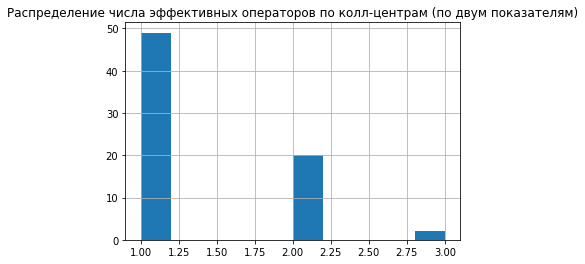

In [45]:
(operator_in_calls.query('calls_efficiency == "effective" and waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа эффективных операторов по колл-центрам (по двум показателям)');

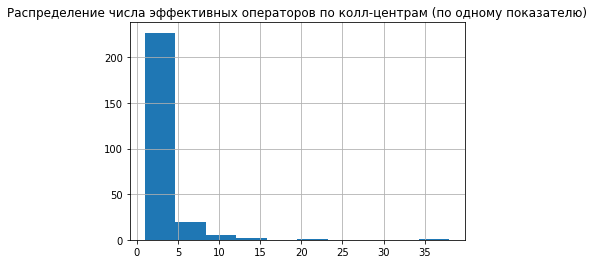

In [46]:
(operator_in_calls.query('calls_efficiency == "effective" or waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа эффективных операторов по колл-центрам (по одному показателю)');

In [47]:
(operator_in_calls.query('calls_efficiency == "effective" or waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False)).head(10)

,user_id,operator_id
221,168187,38
137,167497,20
228,168252,14
60,166916,13
139,167521,11
128,167445,10
211,168091,9
173,167828,9
4,166405,9
237,168336,8


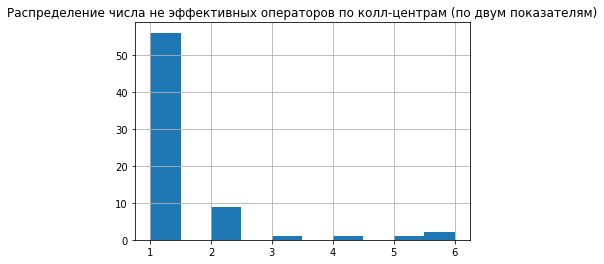

In [48]:
(operator_in_calls.query('calls_efficiency != "effective" and waiting_time_efficiency != "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа не эффективных операторов по колл-центрам (по двум показателям)');

Посмотрим сколько операторов эффективны по каждому признаку:

In [49]:
(print('Количество звонков в день, эффективны:',
    operator_in_calls.query('calls_efficiency=="effective"')['operator_id'].count()))
(print('Количество звонков в день, не эффективны:',
    operator_in_calls.query('calls_efficiency!="effective"')['operator_id'].count()))
(print('Время ожидания на линии в день, эффективны:',
    operator_in_calls.query('waiting_time_efficiency=="effective"')['operator_id'].count()))
(print('Время ожидания на линии в день, не эффективны:',
    operator_in_calls.query('waiting_time_efficiency!="effective"')['operator_id'].count()))

Количество звонков в день, эффективны: 597
Количество звонков в день, не эффективны: 141
Время ожидания на линии в день, эффективны: 138
Время ожидания на линии в день, не эффективны: 600


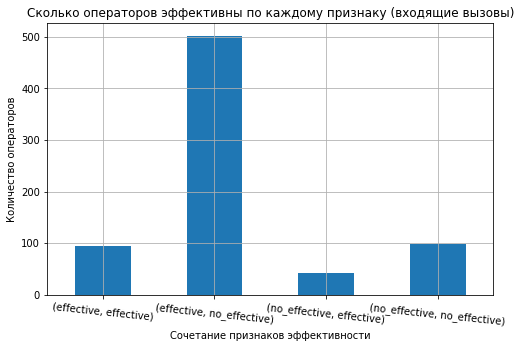

In [50]:
# отобразим эффективность операторов по каждому признаку: графически
plt.figure(figsize=(8, 5))
plt.title('Сколько операторов эффективны по каждому признаку (входящие вызовы)')
(operator_in_calls.groupby(['calls_efficiency', 'waiting_time_efficiency'])['operator_id'].count()
 .plot(kind='bar', grid=True, ylabel='Количество операторов', xlabel='Сочетание признаков эффективности', rot = -6));

In [51]:
# добавим индикатор "успеваемости" операторов
def what_to_do(row):
    waiting_time = row['waiting_time_efficiency']
    calls = row['calls_efficiency']
    if waiting_time == 'effective' and calls == 'effective':
        return 'Премировать'
    if waiting_time == 'effective' or calls == 'effective':
        return 'Провести беседу/обучить'
    if waiting_time != 'effective' and calls != 'effective':
        return 'Провести беседу/уволить'
    
operator_in_calls['what_to_do'] = operator_in_calls.apply(what_to_do, axis=1) 

In [52]:
# уберем лишние столбцы и выведем данные 
results_in_calls = (operator_in_calls[[
    'user_id', 'operator_id', 'days_worked', 'calls_efficiency', 'waiting_time_efficiency', 'what_to_do'
]])
results_in_calls.head(10)

,user_id,operator_id,days_worked,calls_efficiency,waiting_time_efficiency,what_to_do
0,166377,880020,7,no_effective,effective,Провести беседу/обучить
1,166377,880022,8,no_effective,effective,Провести беседу/обучить
2,166377,880026,18,effective,effective,Премировать
3,166377,880028,41,effective,effective,Премировать
4,166391,882476,3,no_effective,no_effective,Провести беседу/уволить
5,166391,882478,1,effective,effective,Премировать
6,166392,886892,1,effective,no_effective,Провести беседу/обучить
7,166392,891900,17,effective,no_effective,Провести беседу/обучить
8,166392,891906,29,effective,no_effective,Провести беседу/обучить
9,166399,886674,9,no_effective,effective,Провести беседу/обучить


<div style="border:solid green 1px; padding: 10px">
    
* Эффективных по двум показателям операторов, как правило, по одному на колл-центр, есть такие, где по два и совсем мало таких, где по три.
    
* По одному из двух показателей эффктивны 1-5 операторов, реже больше.
    
* Не эффективных вовсе по 1-2 оператора на колл-центр, но есть и такие, где их по 5 и более.

## Определение эффективности операторов по внешним исходящим вызовам


### Сравним фактическое количество звонков, которое сделал каждый оператор, с число вызовов, которые оператор может сделать в течение дня

Возьмем длительность звонков, совершенных оператором, и разделим на среднюю продолжительность каждого звонка. Так мы получим число вызовов, которые оператор может сделать в течение дня, и сравним с фактическим числом звонков в день.

In [53]:
# добавим данные по длительности в таблицу
duration_out_calls = (out_calls.query('is_missed_call == False').groupby(['user_id', 'operator_id'])
 .agg({'call_duration':'mean','total_call_duration': 'sum'}).reset_index())
duration_out_calls.columns = ['user_id', 'operator_id', 'mean_call_duration', 'total_call_duration']

operator_out_calls = operator_out_calls.merge(duration_out_calls, on=['user_id', 'operator_id'], how='left').fillna(0)

In [54]:
# добавим столбец со стандартом звонков в день для оператора
operator_out_calls['call_standard'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['mean_call_duration'], 0).fillna(0))

In [55]:
# добавим столбец со стандартом звонков в день для оператора
operator_out_calls['call_standard'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['mean_call_duration'], 0).fillna(0))

In [56]:
# определим эффективно ли операторы работают по осуществлению звонков
operator_out_calls['calls_efficiency'] = operator_out_calls.apply(calls_efficiency, axis=1) 

### Сравним среднюю длительность звонка при исходящем вызове со средней длительностью разговора оператора за звонок

Среднее длительность разговора оператора за звонок определяется как сумма времени разговоров с учетом ожидания деленная на  все обработанные за отчетный период оператором звонки.

In [57]:
# добавим данные по длительности в таблицу
operator_out_calls['duration_per_call'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['calls_count'], 0).fillna(0))

In [58]:
# добавим столбец со стандартом по длительности
out_calls_df_duration = out_calls_df[['user_id', 'ttl_call_duration_per_call']]
out_calls_df_duration.columns = ['user_id', 'duration_standard']
operator_out_calls = operator_out_calls.merge(out_calls_df_duration, on='user_id', how='left')

In [59]:
# добавим индикатор эффективности по показателю
def duration_efficiency(row):
    duration = row['duration_per_call']
    reference = row['duration_standard']
    if duration >= reference:
        return 'effective'
    if duration < reference:
        return 'no_effective'
    
operator_out_calls['duration_efficiency'] = operator_out_calls.apply(duration_efficiency, axis=1) 

### **<font color="green"> Вывод по показателям эффективности операторов на исходящих вызовах </font>**

Мы собрали оба показателя в таблицу с операторами `operator_Out_calls`, посмотрим как много из них соответствуют им.

Добавим еще один столбец для категоризации "успеваемости" операторов.

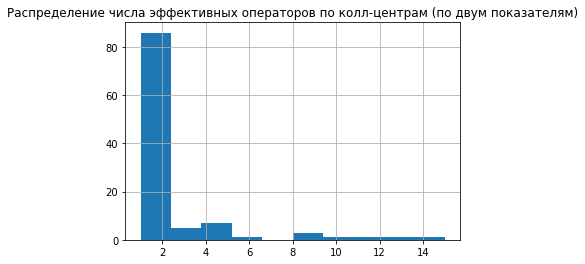

In [60]:
(operator_out_calls.query('calls_efficiency == "effective" and duration_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа эффективных операторов по колл-центрам (по двум показателям)');

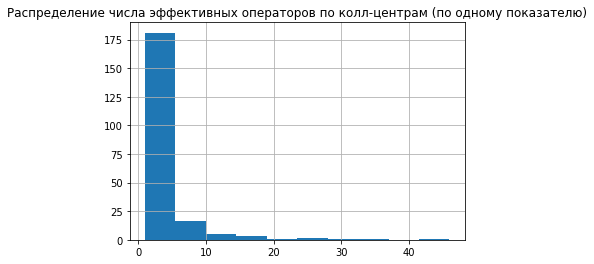

In [61]:
(operator_out_calls.query('calls_efficiency == "effective" or duration_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа эффективных операторов по колл-центрам (по одному показателю)');

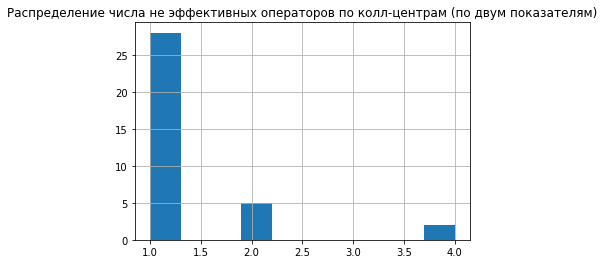

In [62]:
(operator_out_calls.query('calls_efficiency != "effective" and duration_efficiency != "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('Распределение числа не эффективных операторов по колл-центрам (по двум показателям)');

Посмотрим сколько операторов эффективны по каждому признаку:

In [63]:
(print('Количество звонков в день, эффективны:',
    operator_out_calls.query('calls_efficiency=="effective"')['operator_id'].count()))
(print('Количество звонков в день, не эффективны:',
    operator_out_calls.query('calls_efficiency!="effective"')['operator_id'].count()))
(print('Длительность звонка, эффективны:',
    operator_out_calls.query('duration_efficiency=="effective"')['operator_id'].count()))
(print('Длительность звонка, не эффективны:',
    operator_out_calls.query('duration_efficiency!="effective"')['operator_id'].count()))

Количество звонков в день, эффективны: 781
Количество звонков в день, не эффективны: 52
Длительность звонка, эффективны: 246
Длительность звонка, не эффективны: 587


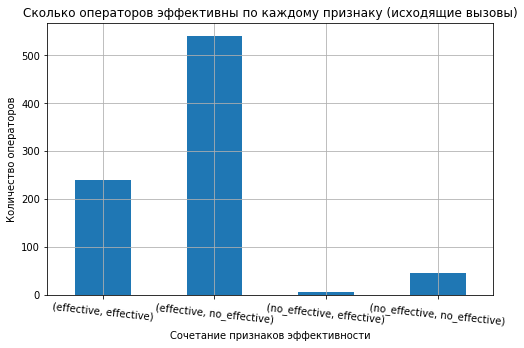

In [64]:
# отобразим эффективность операторов по каждому признаку: графически
plt.figure(figsize=(8, 5))
plt.title('Сколько операторов эффективны по каждому признаку (исходящие вызовы)')
(operator_out_calls.groupby(['calls_efficiency', 'duration_efficiency'])['operator_id'].count()
 .plot(kind='bar', grid=True, ylabel='Количество операторов', xlabel='Сочетание признаков эффективности', rot = -6));

In [65]:
# добавим индикатор "успеваемости" операторов
def what_to_do_v2(row):
    duration = row['duration_efficiency']
    calls = row['calls_efficiency']
    if duration == 'effective' and calls == 'effective':
        return 'Премировать'
    if duration == 'effective' or calls == 'effective':
        return 'Провести беседу/обучить'
    if duration != 'effective' and calls != 'effective':
        return 'Провести беседу/уволить'
    
operator_out_calls['what_to_do'] = operator_out_calls.apply(what_to_do_v2, axis=1) 

In [66]:
# уберем лишние столбцы и выведем данные 
results_out_calls = (operator_out_calls[[
    'user_id', 'operator_id', 'days_worked', 'calls_efficiency', 'duration_efficiency', 'what_to_do'
]])
results_out_calls.head(10)

,user_id,operator_id,days_worked,calls_efficiency,duration_efficiency,what_to_do
0,166377,880020,10,effective,no_effective,Провести беседу/обучить
1,166377,880022,54,effective,effective,Премировать
2,166377,880026,151,effective,no_effective,Провести беседу/обучить
3,166377,880028,154,effective,no_effective,Провести беседу/обучить
4,166377,881278,5,effective,no_effective,Провести беседу/обучить
5,166405,882684,101,effective,effective,Премировать
6,166405,882686,150,effective,no_effective,Провести беседу/обучить
7,166405,882688,7,effective,effective,Премировать
8,166405,882690,40,effective,no_effective,Провести беседу/обучить
9,166405,902510,94,effective,no_effective,Провести беседу/обучить


<div style="border:solid green 1px; padding: 10px">
    
Эффективных по двум показателям операторов, как правило, по одному/два на колл-центр, но есть и такие, где по три и больше.
    
По одному из двух показателей эффктивны 1-5 операторов, реже больше.
    
Не эффективных вовсе по 1оператору на колл-центр, но есть и такие, где их больше.

## Проверка статистических гипотез

### Исходящие звонки колл-центов чаще пропускают чем отвечают на них

Нужно провести сравнение исходящих звонков по колл-центрам и понять действительно ли их чаще предпочитают пропускать, чем отвечать на них.

---
**Определим формулировку для нулевой и альтернативной гипотезы:**

Нулевая гипотеза - исходящие от колл-центров звонки предпочитают пропускать.

Альтернативная гипотеза - на исходящие от колл-центров звонки предпочитают отвечать.

---
Пороговое значение alpha - критический уровень статистической значимости, примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу.

*P-value — это вероятность ошибки при отклонении нулевой гипотезы.*

Для проверки гипотезы используем таблицу `out_calls`. Cоберем из нее датафрейм со столбцами:
* `user_id` - идентификатор колл-центра;
* `is_missed_call` - признак того пропущен ли вызов:
    * `missed_calls` - пропущенные вызовы;
    * `answered_calls` - отвеченные вызовы;
* `calls_count` - количество звонков.

In [67]:
#собираем таблицу
first_hypothesis = (out_calls.pivot_table(index=['user_id', 'is_missed_call'], values='calls_count', aggfunc='sum')
                    .reset_index())
first_hypothesis['is_missed_call'] = (first_hypothesis['is_missed_call'].astype('str')
                                      .replace(['False', 'True'], ['answered_calls', 'missed_calls']))
first_hypothesis = first_hypothesis.replace(['False', 'True'], ['answered_calls', 'missed_calls'])
#first_hypothesis.head(10)

In [68]:
# проверка Но
alpha = 0.05
results = st.ttest_ind(
    first_hypothesis.query('is_missed_call == "answered_calls"')['calls_count'], 
    first_hypothesis.query('is_missed_call == "missed_calls"')['calls_count']
)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8628757121538234
Не получилось отвергнуть нулевую гипотезу


In [69]:
# посчитаем на сколько количество пропущенных больше чем отвеченных
(first_hypothesis.query('is_missed_call == "missed_calls"')['calls_count'].sum()
 - first_hypothesis.query('is_missed_call == "answered_calls"')['calls_count'].sum())

22234

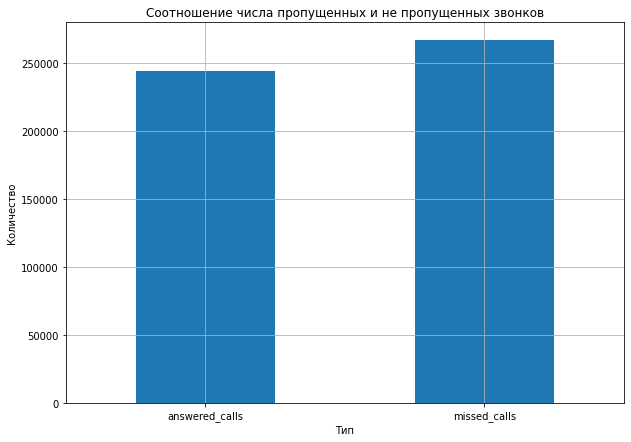

In [70]:
# построим визуализацию соотношения
plt.figure(figsize=(10, 7))
plt.title('Cоотношение числа пропущенных и не пропущенных звонков')
(first_hypothesis.groupby('is_missed_call')['calls_count']
 .sum().plot(kind='bar', grid=True, ylabel='Количество', xlabel='Тип', rot = 0));

<div style="border:solid green 1px; padding: 10px">
    
Полученное значение p-value говорит о том, что хотя количество пропущенных и отвеченных исходящих вызовов для колл-центров  неодинакова, с вероятностью чуть больше 86% (что составляет намного больше половины случаев) такое или большее различие можно получить случайно.Такая вероятность случайно получить различие в значениях показателя, дает возможсть задуматься о возможном значимом различии в количестве принятых или пропущенных звонков от операторов колл-центров.

Суммарное количество пропущенных вызовов от операторов колл-центров превышает количество ответов на их звонки на 22234 вызова за анализируемый период.

###  При входящих обращениях, из-за долгого времени ожидания, часто не дожидаются назначения оператора

Нужно провести сравнение входящих звонков по колл-центрам и понять действительно ли из-за долгого времени ожидания на линии, клиенты часто не дожидаются назначения оператора.

---
**Определим формулировку для нулевой и альтернативной гипотезы:**

Нулевая гипотеза - долгое время ожидания на линии не влияет на решимость клиентов дождаться ответа оператора.

Альтернативная гипотеза - из-за долгого времени ожидания на линии звонки не доходят до назначения оператора.

---
Пороговое значение alpha - критический уровень статистической значимости, примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу.

В самом лучшем случае отвечать на звонок оператору следует в течение 20 секунд, 30 секунд – показатель похуже, а вот ожидание клиента длиною в минуту и более вовсе считается недопустимым. 

Ограничим данные порогом ожидания на линии больше 20 секунд и посчитаем сколько звонков достигло оператора, а сколько "сорвались" до назначения оператора на звонок.

Cоберем из нее датафрейм, ограничив таблицу со столбцами:
* `user_id` - идентификатор колл-центра;
* `operator_id` - идентификатор оператора;
* `is_missed_call` - признак того пропущен ли вызов:
    - `True` - пропущенные вызовы;
    - `False` - принятые вызовы;
* `calls_count` - количество звонков.

Для звонков без оператора в столбце `is_missed_call` оставим только значения `True`, т.к. принятые звонки без назначенного на них оператора - это, скорее всего, тех. сбой.

In [71]:
second_hypothesis = (df.query('direction == "in" and internal==False and waiting_time > 20')
                     [['user_id', 'operator_id', 'is_missed_call', 'calls_count']])
second_hypothesis = (second_hypothesis
 .pivot_table(index=['user_id', 'operator_id', 'is_missed_call'], values='calls_count', aggfunc='sum').reset_index())

In [72]:
second_hypothesis = (second_hypothesis.query(
    '(operator_id == 0 and is_missed_call == True) or operator_id != 0'))

In [73]:
# проверка Но
alpha = 0.05
results = st.ttest_ind(
    second_hypothesis.query('operator_id == 0')['calls_count'], 
    second_hypothesis.query('operator_id != 0')['calls_count']
)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0007865479950672894
Отвергаем нулевую гипотезу


In [74]:
# посчитаем на сколько количество пропущенных больше чем отвеченных
(second_hypothesis.query('operator_id == 0')['calls_count'].sum()
 - second_hypothesis.query('operator_id != 0')['calls_count'].sum())

9993

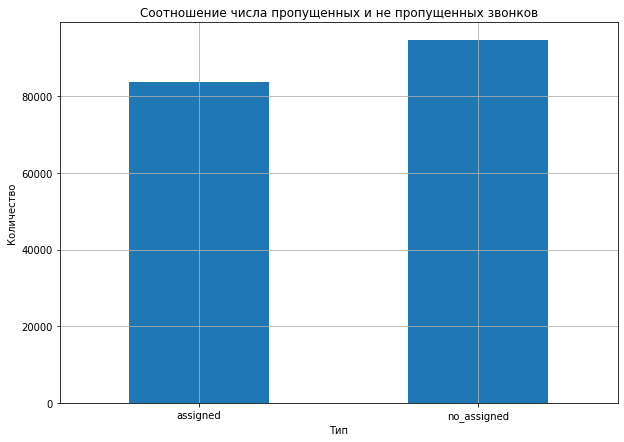

In [75]:
# построим визуализацию соотношения
second_hypothesis['is_missed_call'] = (
second_hypothesis['is_missed_call'].astype('str').replace(['False', 'True'], ['assigned', 'no_assigned']))
plt.figure(figsize=(10, 7))
plt.title('Cоотношение числа пропущенных и не пропущенных звонков')
(second_hypothesis.groupby('is_missed_call')['calls_count']
 .sum().plot(kind='bar', grid=True, ylabel='Количество', xlabel='Тип', rot = 0));

<div style="border:solid green 1px; padding: 10px">
    
Значение p-value говорит о том, что такое или большее различие практически не возможно получить случайно. Это дает возможность делать вывод о значимом различии в зависимости назначения оператора от длитености ожидания на линии.

9993 звонка "сорвались" до назначения оператора на них.

## Формулировка выводов по показателям эффективности

<div style="border:solid green 2px; padding: 20px">
    
Мы располагали данными, содержащими информацию о колл-центрах и их операторах, такую как тип звонка (входящий или исходящий), количество звонков, длительность звонков и т.д. Период с 1 августа 2019 по 27 ноября 2019, практически 4 месяца. Однако количество записей в начале периода значительно меньше чем в конце. 
    
1. Исходящих звонков больше, чем входящих на ~ 9000.
2. Разговоров между операторами намного меньше чем по внешним вызовам (всего 5763 шт.).
3. Разница между принятыми и пропущенными вызовами (как для входящих, так и для исходящих) составляет около 6000.
4. По операторам: 
    - Большинство обрабатывает от 1 до 200 звонков, но есть и те, у кого звонков больше (максимум 4817 шт.).
    - По длительности (общей или без ожидания) есть вызовы:
        * по несколько секунд (одна, семь, десять), возможно это "сорвавшиеся" звонки, к примеру из-за разъединения или в случае нечаянного нажатия кнопки "отбой связи", или ошиблись номером;
        * по несколько часов (10 и более) и даже больше одного дня, что выглядит довольно странно.
    - Eсть операторы, которые за один день работы обработали один звонок, а есть такие, у которых в день звонков обработано намного больше.
    
**По показателям эффективности для колл-центров, специализирующихся на внешних входящих вызовах.**
    
Эффективных по двум показателям операторов, как правило, по одному на колл-центр, есть такие, где по два и совсем мало таких, где по три.
    
По одному из двух показателей эффктивны 1-5 операторов, реже больше.

Не эффективных вовсе по 1-2 оператора на колл-центр, но есть и такие, где их по 5 и более.
    
1. Количество звонков в день:
    - эффективно операторов: 597 человек;
    - не эффективно операторов: 141 человек;
2. Время ожидания на линии в день:
    - эффективно операторов: 138 человек;
    - не эффективно операторов: 600 человек.

    
**По показателям эффективности для колл-центров, специализирующихся на внешних исходящих вызовах.**
    
Эффективных по двум показателям операторов, как правило, по одному/два на колл-центр, но есть и такие, где по три и больше.

По одному из двух показателей эффктивны 1-5 операторов, реже больше.

Не эффективных вовсе по 1оператору на колл-центр, но есть и такие, где их больше.
    
1. Количество звонков в день:
    - эффективно операторов: 781 человек;
    - не эффективно операторов: 52 человек;
2. Длительность звонка:
    эффективно операторов: 246 человек;
    - не эффективно операторов: 587 человек.

Возможно данные таблицы помогут принять решение относительно каждого оператора:

In [76]:
results_in_calls

,user_id,operator_id,days_worked,calls_efficiency,waiting_time_efficiency,what_to_do
0,166377,880020,7,no_effective,effective,Провести беседу/обучить
1,166377,880022,8,no_effective,effective,Провести беседу/обучить
2,166377,880026,18,effective,effective,Премировать
3,166377,880028,41,effective,effective,Премировать
4,166391,882476,3,no_effective,no_effective,Провести беседу/уволить
5,166391,882478,1,effective,effective,Премировать
6,166392,886892,1,effective,no_effective,Провести беседу/обучить
7,166392,891900,17,effective,no_effective,Провести беседу/обучить
8,166392,891906,29,effective,no_effective,Провести беседу/обучить
9,166399,886674,9,no_effective,effective,Провести беседу/обучить


In [77]:
results_out_calls

,user_id,operator_id,days_worked,calls_efficiency,duration_efficiency,what_to_do
0,166377,880020,10,effective,no_effective,Провести беседу/обучить
1,166377,880022,54,effective,effective,Премировать
2,166377,880026,151,effective,no_effective,Провести беседу/обучить
3,166377,880028,154,effective,no_effective,Провести беседу/обучить
4,166377,881278,5,effective,no_effective,Провести беседу/обучить
5,166405,882684,101,effective,effective,Премировать
6,166405,882686,150,effective,no_effective,Провести беседу/обучить
7,166405,882688,7,effective,effective,Премировать
8,166405,882690,40,effective,no_effective,Провести беседу/обучить
9,166405,902510,94,effective,no_effective,Провести беседу/обучить


## Формулировка выводов по статистическим гипотезам

<div style="border:solid green 2px; padding: 20px">
  
Были проверена две гипотезы:
  
___
   
**1. Исходящие звонки колл-центов чаще пропускают чем отвечают на них**

___
    
Полученное значение p-value говорит о том, что хотя количество пропущенных и отвеченных исходящих вызовов для колл-центров неодинакова, с вероятностью чуть больше 86% (что составляет намного больше половины случаев) такое или большее различие можно получить случайно.Такая вероятность случайно получить различие в значениях показателя, дает возможсть задуматься о возможном значимом различии в количестве принятых или пропущенных звонков от операторов колл-центров.

Суммарное количество пропущенных вызовов от операторов колл-центров превышает количество ответов на их звонки на 22234 вызова за анализируемый период.
    
---
**2. При входящих обращениях, из-за долгого времени ожидания, часто не дожидаются назначения оператора**
    
---
Значение p-value говорит о том, что такое или большее различие практически не возможно получить случайно. Это дает возможность делать вывод о значимом различии в зависимости назначения оператора от длитености ожидания на линии.

9993 звонка "сорвались" до назначения оператора на них.

## Презентация и дашборд

Презентацию можно посмотреть по [ссылке](https://disk.yandex.ru/i/H1ywfOoDWiS0Ig)

Дашборд размещен на [Tableau Public](https://public.tableau.com/views/-_16669659004100/-?:language=en-US&:display_count=n&:origin=viz_share_link)